# Sagemaker Donkey introduction

This first tutorial will introduce you to the SageMaker service and its [Jupyter Notebooks](https://docs.aws.amazon.com/sagemaker/latest/dg/how-it-works-notebooks-instances.html).

More specifically, we'll have a look at the data format used by the [Donkey](https://github.com/wroscoe/donkey) library when saving training data. The data is generated when you manually drive the car on the track. We'll also play around with some of the more common libraries and data structures available in the Notebooks, such as [pandas](https://pandas.pydata.org/).

## Download sample data

We've created some sample data for you start working on, so that you don't have to wait for your car to be ready. Since he sample data is recorded on another car on another track, it might not be representative for you car. However, it will allow you to get started, and it will provide a good foundation for you to continue training once you get data from you own car.

Download the sample driving runs, called *Tubs* in Donkey:

In [25]:
from sagemaker import get_execution_role

# Bucket location to get training data
sample_data_location = 's3://jayway-robocar-raw-data/samples'

# IAM execution role that gives SageMaker access to resources in your AWS account.
role = get_execution_role()

In [26]:
role

'arn:aws:iam::554360467205:role/service-role/AmazonSageMaker-ExecutionRole-20180227T104305'

In [27]:
!aws s3 cp {sample_data_location}/ore.zip .

fatal error: An error occurred (403) when calling the HeadObject operation: Forbidden


In [28]:
!unzip -o ore.zip

Archive:  ore.zip
  inflating: tub_8_18-02-09/record_3503.json  
  inflating: tub_8_18-02-09/record_7026.json  
  inflating: tub_8_18-02-09/record_1075.json  
  inflating: tub_8_18-02-09/11156_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/4805_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_1113.json  
  inflating: tub_8_18-02-09/record_624.json  
  inflating: tub_8_18-02-09/record_6858.json  
  inflating: tub_8_18-02-09/record_10103.json  
  inflating: tub_8_18-02-09/record_8216.json  
  inflating: tub_8_18-02-09/record_10640.json  
  inflating: tub_8_18-02-09/record_12236.json  
  inflating: tub_8_18-02-09/2152_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_5947.json  
  inflating: tub_8_18-02-09/record_4638.json  
  inflating: tub_8_18-02-09/record_8744.json  
  inflating: tub_8_18-02-09/record_5499.json  
  inflating: tub_8_18-02-09/record_12658.json  
  inflating: tub_8_18-02-09/record_8963.json  
  inflating: tub_8_18-02-09/record_12941.json  
  inflatin

  inflating: tub_8_18-02-09/2739_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7815.json  
  inflating: tub_8_18-02-09/8649_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_5322.json  
  inflating: tub_8_18-02-09/record_5467.json  
  inflating: tub_8_18-02-09/record_9885.json  
  inflating: tub_8_18-02-09/record_8068.json  
  inflating: tub_8_18-02-09/record_5926.json  
  inflating: tub_8_18-02-09/record_8342.json  
  inflating: tub_8_18-02-09/record_11688.json  
  inflating: tub_8_18-02-09/2575_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_4108.json  
  inflating: tub_8_18-02-09/record_10963.json  
  inflating: tub_8_18-02-09/record_3542.json  
  inflating: tub_8_18-02-09/1686_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6538.json  
  inflating: tub_8_18-02-09/record_3862.json  
  inflating: tub_8_18-02-09/record_3523.json  
  inflating: tub_8_18-02-09/record_10120.json  
  inflating: tub_8_18-02-09/record_10445.json  
  inflating: tub_8_1

  inflating: tub_8_18-02-09/3735_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2511.json  
  inflating: tub_8_18-02-09/7511_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/10534_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9493_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3880_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12175.json  
  inflating: tub_8_18-02-09/7_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_1037.json  
  inflating: tub_8_18-02-09/record_10778.json  
  inflating: tub_8_18-02-09/2726_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_4773.json  
  inflating: tub_8_18-02-09/record_4882.json  
  inflating: tub_8_18-02-09/8300_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_175.json  
  inflating: tub_8_18-02-09/record_2732.json  
  inflating: tub_8_18-02-09/record_44.json  
  inflating: tub_8_18-02-09/619_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12541.json  
  inflating: tub_8_18-02-09/1

  inflating: tub_8_18-02-09/778_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/4284_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_5212.json  
  inflating: tub_8_18-02-09/record_8923.json  
  inflating: tub_8_18-02-09/1113_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12671.json  
  inflating: tub_8_18-02-09/10111_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_9349.json  
  inflating: tub_8_18-02-09/7848_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9862_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7620.json  
  inflating: tub_8_18-02-09/7156_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/13560_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_3021.json  
  inflating: tub_8_18-02-09/3149_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/8900_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_8983.json  
  inflating: tub_8_18-02-09/record_12255.json  
  inflating: tub_8_18-02-09/1417_cam-image_array_.jpg  
  inf

  inflating: tub_8_18-02-09/11810_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12969.json  
  inflating: tub_8_18-02-09/3176_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_10122.json  
  inflating: tub_8_18-02-09/record_4120.json  
  inflating: tub_8_18-02-09/record_11255.json  
  inflating: tub_8_18-02-09/5341_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9048_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/454_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_9017.json  
  inflating: tub_8_18-02-09/record_10565.json  
  inflating: tub_8_18-02-09/4571_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_9462.json  
  inflating: tub_8_18-02-09/4133_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_214.json  
  inflating: tub_8_18-02-09/record_707.json  
  inflating: tub_8_18-02-09/record_9685.json  
  inflating: tub_8_18-02-09/11425_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3788_cam-image_array_.jpg  
  inflating: tub_8_18-0

  inflating: tub_8_18-02-09/5463_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/13163_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7245.json  
  inflating: tub_8_18-02-09/8372_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9392_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_5772.json  
  inflating: tub_8_18-02-09/record_4922.json  
  inflating: tub_8_18-02-09/12090_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/7644_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/8682_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12341.json  
  inflating: tub_8_18-02-09/record_5899.json  
  inflating: tub_8_18-02-09/record_4049.json  
  inflating: tub_8_18-02-09/record_4655.json  
  inflating: tub_8_18-02-09/record_9416.json  
  inflating: tub_8_18-02-09/record_7363.json  
  inflating: tub_8_18-02-09/record_1016.json  
  inflating: tub_8_18-02-09/15_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_940.json  
  inflating: tub_8_18-02-09/11016_c

  inflating: tub_8_18-02-09/10963_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3033_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_9574.json  
  inflating: tub_8_18-02-09/7686_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_3791.json  
  inflating: tub_8_18-02-09/record_4016.json  
  inflating: tub_8_18-02-09/record_13088.json  
  inflating: tub_8_18-02-09/record_13268.json  
  inflating: tub_8_18-02-09/310_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_9176.json  
  inflating: tub_8_18-02-09/record_13236.json  
  inflating: tub_8_18-02-09/7672_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_10576.json  
  inflating: tub_8_18-02-09/record_12111.json  
  inflating: tub_8_18-02-09/5838_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11624.json  
  inflating: tub_8_18-02-09/record_3484.json  
  inflating: tub_8_18-02-09/record_2164.json  
  inflating: tub_8_18-02-09/record_8838.json  
  inflating: tub_8_18-02-09/7053_cam-image_arra

  inflating: tub_8_18-02-09/3959_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6414.json  
  inflating: tub_8_18-02-09/3393_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3051_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/6942_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_8271.json  
  inflating: tub_8_18-02-09/record_8286.json  
  inflating: tub_8_18-02-09/record_11712.json  
  inflating: tub_8_18-02-09/8871_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11285.json  
  inflating: tub_8_18-02-09/638_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_13120.json  
  inflating: tub_8_18-02-09/1443_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3486_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_5809.json  
  inflating: tub_8_18-02-09/11432_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2445.json  
  inflating: tub_8_18-02-09/11842_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_10595.json  
  inflating:

  inflating: tub_8_18-02-09/4382_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9795_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6977.json  
  inflating: tub_8_18-02-09/record_1589.json  
  inflating: tub_8_18-02-09/10416_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_1155.json  
  inflating: tub_8_18-02-09/9067_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7123.json  
  inflating: tub_8_18-02-09/record_11834.json  
  inflating: tub_8_18-02-09/2827_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_1091.json  
  inflating: tub_8_18-02-09/4149_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3181_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2371_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_4287.json  
  inflating: tub_8_18-02-09/record_2138.json  
  inflating: tub_8_18-02-09/record_7439.json  
  inflating: tub_8_18-02-09/10437_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12374.json  
  inflating: tub_8_18-

  inflating: tub_8_18-02-09/1486_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_3440.json  
  inflating: tub_8_18-02-09/12107_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11636.json  
  inflating: tub_8_18-02-09/10902_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_10478.json  
  inflating: tub_8_18-02-09/record_9058.json  
  inflating: tub_8_18-02-09/9275_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/13148_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/6361_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_3313.json  
  inflating: tub_8_18-02-09/11636_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2293_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/13201_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_3821.json  
  inflating: tub_8_18-02-09/8661_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2246_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2239.json  
  inflating: tub_8_18-02-09/12203_cam-image_arra

  inflating: tub_8_18-02-09/8968_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/8168_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/7721_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/7547_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12979_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/677_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11213.json  
  inflating: tub_8_18-02-09/4901_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/4261_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/6730_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/1703_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/4677_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/6781_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_5550.json  
  inflating: tub_8_18-02-09/record_13293.json  
  inflating: tub_8_18-02-09/record_10439.json  
  inflating: tub_8_18-02-09/1256_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6665.json  
  inflating: tub_8_18-02-09/8812_c

  inflating: tub_8_18-02-09/record_7276.json  
  inflating: tub_8_18-02-09/record_13524.json  
  inflating: tub_8_18-02-09/record_7987.json  
  inflating: tub_8_18-02-09/352_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12283_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2122.json  
  inflating: tub_8_18-02-09/record_11579.json  
  inflating: tub_8_18-02-09/8444_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2667_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2103.json  
  inflating: tub_8_18-02-09/record_5187.json  
  inflating: tub_8_18-02-09/record_3898.json  
  inflating: tub_8_18-02-09/record_6726.json  
  inflating: tub_8_18-02-09/record_11108.json  
  inflating: tub_8_18-02-09/3395_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_685.json  
  inflating: tub_8_18-02-09/record_10056.json  
  inflating: tub_8_18-02-09/record_5086.json  
  inflating: tub_8_18-02-09/7731_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6639.json  
  i

  inflating: tub_8_18-02-09/11032_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_303.json  
  inflating: tub_8_18-02-09/2079_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3085_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_762.json  
  inflating: tub_8_18-02-09/record_1260.json  
  inflating: tub_8_18-02-09/record_9702.json  
  inflating: tub_8_18-02-09/record_7625.json  
  inflating: tub_8_18-02-09/record_2016.json  
  inflating: tub_8_18-02-09/7859_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_3002.json  
  inflating: tub_8_18-02-09/record_6453.json  
  inflating: tub_8_18-02-09/11763_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2061_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5489_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_9826.json  
  inflating: tub_8_18-02-09/record_4129.json  
  inflating: tub_8_18-02-09/record_8423.json  
  inflating: tub_8_18-02-09/record_5121.json  
  inflating: tub_8_18-02-09/record_5203.json

  inflating: tub_8_18-02-09/3537_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/6221_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9691_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_5912.json  
  inflating: tub_8_18-02-09/6754_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_8881.json  
  inflating: tub_8_18-02-09/record_5673.json  
  inflating: tub_8_18-02-09/743_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_9261.json  
  inflating: tub_8_18-02-09/record_4719.json  
  inflating: tub_8_18-02-09/record_6825.json  
  inflating: tub_8_18-02-09/record_10319.json  
  inflating: tub_8_18-02-09/791_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3250_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11391_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7136.json  
  inflating: tub_8_18-02-09/5959_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/666_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_10241.json  
  inflating: tub_

  inflating: tub_8_18-02-09/5157_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11586_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2402_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12573_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2762_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_1712.json  
  inflating: tub_8_18-02-09/12289_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_8761.json  
  inflating: tub_8_18-02-09/151_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12609_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/40_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/6284_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_9520.json  
  inflating: tub_8_18-02-09/9669_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_13034.json  
  inflating: tub_8_18-02-09/6196_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_320.json  
  inflating: tub_8_18-02-09/13463_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_

  inflating: tub_8_18-02-09/712_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/4282_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2496.json  
  inflating: tub_8_18-02-09/record_7296.json  
  inflating: tub_8_18-02-09/record_13625.json  
  inflating: tub_8_18-02-09/record_6847.json  
  inflating: tub_8_18-02-09/record_11770.json  
  inflating: tub_8_18-02-09/3481_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/6492_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9474_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/7512_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2407.json  
  inflating: tub_8_18-02-09/5438_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_9674.json  
  inflating: tub_8_18-02-09/3248_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11567.json  
  inflating: tub_8_18-02-09/record_10400.json  
  inflating: tub_8_18-02-09/4231_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/7652_cam-image_array_.jpg  
  inflating: t

  inflating: tub_8_18-02-09/record_8756.json  
  inflating: tub_8_18-02-09/record_1183.json  
  inflating: tub_8_18-02-09/1293_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6900.json  
  inflating: tub_8_18-02-09/7311_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2882_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/13048_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/8445_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_950.json  
  inflating: tub_8_18-02-09/3055_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/4884_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_10942.json  
  inflating: tub_8_18-02-09/record_414.json  
  inflating: tub_8_18-02-09/record_9981.json  
  inflating: tub_8_18-02-09/6782_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/7772_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_9383.json  
  inflating: tub_8_18-02-09/2864_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5423_cam-image_array_.jpg  
  inflat

  inflating: tub_8_18-02-09/801_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_3464.json  
  inflating: tub_8_18-02-09/5644_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2675_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/885_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2585.json  
  inflating: tub_8_18-02-09/1201_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/1349_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/13338_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11388.json  
  inflating: tub_8_18-02-09/record_11274.json  
  inflating: tub_8_18-02-09/6408_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/1078_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/7849_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5498_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_10060.json  
  inflating: tub_8_18-02-09/11480_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_434.json  
  inflating: tub_8_18-02-09/record_3876.json

  inflating: tub_8_18-02-09/2124_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12210_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2908_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7861.json  
  inflating: tub_8_18-02-09/3317_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9261_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_5784.json  
  inflating: tub_8_18-02-09/record_5819.json  
  inflating: tub_8_18-02-09/2862_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/13202_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/7690_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2596.json  
  inflating: tub_8_18-02-09/8418_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2238.json  
  inflating: tub_8_18-02-09/record_6267.json  
  inflating: tub_8_18-02-09/12316_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_462.json  
  inflating: tub_8_18-02-09/record_1579.json  
  inflating: tub_8_18-02-09/record_6925.json  
  inflating: tu

  inflating: tub_8_18-02-09/6476_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_9595.json  
  inflating: tub_8_18-02-09/record_12059.json  
  inflating: tub_8_18-02-09/1787_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/6900_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_8831.json  
  inflating: tub_8_18-02-09/record_2639.json  
  inflating: tub_8_18-02-09/1691_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/10667_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12903_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/1189_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12453_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_3983.json  
  inflating: tub_8_18-02-09/3291_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9272_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_1702.json  
  inflating: tub_8_18-02-09/record_3509.json  
  inflating: tub_8_18-02-09/4937_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6144.json  
  in

  inflating: tub_8_18-02-09/record_10796.json  
  inflating: tub_8_18-02-09/record_11749.json  
  inflating: tub_8_18-02-09/record_6874.json  
  inflating: tub_8_18-02-09/9916_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11950_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/219_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6880.json  
  inflating: tub_8_18-02-09/record_9613.json  
  inflating: tub_8_18-02-09/record_1254.json  
  inflating: tub_8_18-02-09/6626_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9869_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_10264.json  
  inflating: tub_8_18-02-09/record_13260.json  
  inflating: tub_8_18-02-09/13615_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5638_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12362_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9385_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_10578.json  
  inflating: tub_8_18-02-09/record_9024.json  
  inflating: tub_8_

  inflating: tub_8_18-02-09/record_747.json  
  inflating: tub_8_18-02-09/record_332.json  
  inflating: tub_8_18-02-09/record_9819.json  
  inflating: tub_8_18-02-09/record_10144.json  
  inflating: tub_8_18-02-09/5334_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7311.json  
  inflating: tub_8_18-02-09/11271_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2205_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/1511_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/4128_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_8352.json  
  inflating: tub_8_18-02-09/record_8865.json  
  inflating: tub_8_18-02-09/9830_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/7399_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12437_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3595_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2913_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_106.json  
  inflating: tub_8_18-02-09/9730_cam-image_array_.jpg  
  inflat

  inflating: tub_8_18-02-09/1320_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5410_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9311_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3879_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_1197.json  
  inflating: tub_8_18-02-09/3522_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_8679.json  
  inflating: tub_8_18-02-09/5212_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2860.json  
  inflating: tub_8_18-02-09/record_1140.json  
  inflating: tub_8_18-02-09/4280_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6964.json  
  inflating: tub_8_18-02-09/record_8994.json  
  inflating: tub_8_18-02-09/13265_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/6038_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_4939.json  
  inflating: tub_8_18-02-09/2909_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/10795_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_13363.json  
  inf

  inflating: tub_8_18-02-09/4974_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11148_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_10363.json  
  inflating: tub_8_18-02-09/6402_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_1886.json  
  inflating: tub_8_18-02-09/record_5302.json  
  inflating: tub_8_18-02-09/record_9393.json  
  inflating: tub_8_18-02-09/record_5768.json  
  inflating: tub_8_18-02-09/2613_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5559_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11021_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11348_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_692.json  
  inflating: tub_8_18-02-09/record_7992.json  
  inflating: tub_8_18-02-09/record_11780.json  
  inflating: tub_8_18-02-09/record_3378.json  
  inflating: tub_8_18-02-09/3550_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/10635_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/4485_cam-image_array_.jpg  
  inflating:

  inflating: tub_8_18-02-09/2484_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11124_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6415.json  
  inflating: tub_8_18-02-09/record_1868.json  
  inflating: tub_8_18-02-09/1780_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12207_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/8625_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_4851.json  
  inflating: tub_8_18-02-09/record_9914.json  
  inflating: tub_8_18-02-09/record_7545.json  
  inflating: tub_8_18-02-09/record_11957.json  
  inflating: tub_8_18-02-09/record_11080.json  
  inflating: tub_8_18-02-09/11184_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/4265_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7759.json  
  inflating: tub_8_18-02-09/record_4683.json  
  inflating: tub_8_18-02-09/11123_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/4725_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11638_cam-image_array_.jpg  
  inflatin

  inflating: tub_8_18-02-09/record_4459.json  
  inflating: tub_8_18-02-09/11051_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9724_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2039.json  
  inflating: tub_8_18-02-09/5772_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_8721.json  
  inflating: tub_8_18-02-09/record_4098.json  
  inflating: tub_8_18-02-09/1173_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_1436.json  
  inflating: tub_8_18-02-09/record_7895.json  
  inflating: tub_8_18-02-09/10309_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6787.json  
  inflating: tub_8_18-02-09/2440_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_3143.json  
  inflating: tub_8_18-02-09/6199_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7845.json  
  inflating: tub_8_18-02-09/record_1751.json  
  inflating: tub_8_18-02-09/record_2714.json  
  inflating: tub_8_18-02-09/1168_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12267

  inflating: tub_8_18-02-09/record_8729.json  
  inflating: tub_8_18-02-09/11736_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7042.json  
  inflating: tub_8_18-02-09/record_6395.json  
  inflating: tub_8_18-02-09/record_6830.json  
  inflating: tub_8_18-02-09/7076_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_13500.json  
  inflating: tub_8_18-02-09/10114_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2935_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/7855_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_3385.json  
  inflating: tub_8_18-02-09/record_7839.json  
  inflating: tub_8_18-02-09/record_4934.json  
  inflating: tub_8_18-02-09/8245_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12210.json  
  inflating: tub_8_18-02-09/record_7116.json  
  inflating: tub_8_18-02-09/10459_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_8819.json  
  inflating: tub_8_18-02-09/record_10575.json  
  inflating: tub_8_18-02-09/8246_cam-i

  inflating: tub_8_18-02-09/10091_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12079.json  
  inflating: tub_8_18-02-09/record_2512.json  
  inflating: tub_8_18-02-09/3117_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12639.json  
  inflating: tub_8_18-02-09/record_2611.json  
  inflating: tub_8_18-02-09/5873_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5078_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7146.json  
  inflating: tub_8_18-02-09/4148_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11734_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_4866.json  
  inflating: tub_8_18-02-09/record_9591.json  
  inflating: tub_8_18-02-09/2792_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/1276_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9867_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9113_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/10191_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3723_cam-image_array_.

  inflating: tub_8_18-02-09/1741_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12083.json  
  inflating: tub_8_18-02-09/record_3158.json  
  inflating: tub_8_18-02-09/record_11642.json  
  inflating: tub_8_18-02-09/9109_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/461_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6027.json  
  inflating: tub_8_18-02-09/record_10570.json  
  inflating: tub_8_18-02-09/record_5743.json  
  inflating: tub_8_18-02-09/record_13173.json  
  inflating: tub_8_18-02-09/record_5795.json  
  inflating: tub_8_18-02-09/record_9485.json  
  inflating: tub_8_18-02-09/2202_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5076_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/10036_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_6074.json  
  inflating: tub_8_18-02-09/6496_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/858_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11478_cam-image_array_.jpg  
  inflating: tub_8_18-

  inflating: tub_8_18-02-09/record_4646.json  
  inflating: tub_8_18-02-09/3422_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_13144.json  
  inflating: tub_8_18-02-09/9040_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11577.json  
  inflating: tub_8_18-02-09/record_8101.json  
  inflating: tub_8_18-02-09/record_2295.json  
  inflating: tub_8_18-02-09/12269_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/439_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11220_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3853_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_13323.json  
  inflating: tub_8_18-02-09/record_12130.json  
  inflating: tub_8_18-02-09/record_11169.json  
  inflating: tub_8_18-02-09/11624_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_815.json  
  inflating: tub_8_18-02-09/record_10936.json  
  inflating: tub_8_18-02-09/2025_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/1269_cam-image_array_.jpg  
  inflating: tub_8_

  inflating: tub_8_18-02-09/13313_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11532.json  
  inflating: tub_8_18-02-09/10143_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11289.json  
  inflating: tub_8_18-02-09/record_10203.json  
  inflating: tub_8_18-02-09/8639_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_8046.json  
  inflating: tub_8_18-02-09/record_5245.json  
  inflating: tub_8_18-02-09/record_1146.json  
  inflating: tub_8_18-02-09/record_1199.json  
  inflating: tub_8_18-02-09/12424_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_4473.json  
  inflating: tub_8_18-02-09/record_4189.json  
  inflating: tub_8_18-02-09/record_10870.json  
  inflating: tub_8_18-02-09/record_3611.json  
  inflating: tub_8_18-02-09/12209_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_915.json  
  inflating: tub_8_18-02-09/record_7617.json  
  inflating: tub_8_18-02-09/record_4119.json  
  inflating: tub_8_18-02-09/9409_cam-image_array_.jpg  

  inflating: tub_8_18-02-09/7996_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11360.json  
  inflating: tub_8_18-02-09/record_5805.json  
  inflating: tub_8_18-02-09/record_12281.json  
  inflating: tub_8_18-02-09/record_11434.json  
  inflating: tub_8_18-02-09/record_9602.json  
  inflating: tub_8_18-02-09/12874_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3386_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2226_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12300.json  
  inflating: tub_8_18-02-09/record_5525.json  
  inflating: tub_8_18-02-09/11847_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12865_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/4075_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/4758_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5040_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/8100_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/1081_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5222_cam-image_array

  inflating: tub_8_18-02-09/record_3310.json  
  inflating: tub_8_18-02-09/4118_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11065_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/1920_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2897.json  
  inflating: tub_8_18-02-09/record_12451.json  
  inflating: tub_8_18-02-09/847_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7511.json  
  inflating: tub_8_18-02-09/12425_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11117.json  
  inflating: tub_8_18-02-09/12074_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3572_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5365_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/7425_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2911.json  
  inflating: tub_8_18-02-09/record_9439.json  
  inflating: tub_8_18-02-09/4126_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_5360.json  
  inflating: tub_8_18-02-09/10002_cam-image_array_.jpg  
  i

  inflating: tub_8_18-02-09/8441_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12848.json  
  inflating: tub_8_18-02-09/3115_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2262_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_13092.json  
  inflating: tub_8_18-02-09/record_4865.json  
  inflating: tub_8_18-02-09/156_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/10701_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/1271_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3287_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_13367.json  
  inflating: tub_8_18-02-09/3227_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_1365.json  
  inflating: tub_8_18-02-09/6933_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_793.json  
  inflating: tub_8_18-02-09/record_12921.json  
  inflating: tub_8_18-02-09/record_8190.json  
  inflating: tub_8_18-02-09/record_2884.json  
  inflating: tub_8_18-02-09/record_8150.json  
  inflating: tub_8_18-0

  inflating: tub_8_18-02-09/5290_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/9927_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/728_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/679_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11164.json  
  inflating: tub_8_18-02-09/5629_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/10916_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7244.json  
  inflating: tub_8_18-02-09/record_9061.json  
  inflating: tub_8_18-02-09/record_9143.json  
  inflating: tub_8_18-02-09/11078_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/129_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5063_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/10847_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/388_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7921.json  
  inflating: tub_8_18-02-09/record_1797.json  
  inflating: tub_8_18-02-09/record_4803.json  
  inflating: tub_8_18-02-09/record_1286.json  
  inflat

  inflating: tub_8_18-02-09/record_8562.json  
  inflating: tub_8_18-02-09/3132_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/1960_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/5495_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_10127.json  
  inflating: tub_8_18-02-09/record_2823.json  
  inflating: tub_8_18-02-09/record_7236.json  
  inflating: tub_8_18-02-09/4015_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/11899_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/12022_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12140.json  
  inflating: tub_8_18-02-09/record_9748.json  
  inflating: tub_8_18-02-09/11292_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_4573.json  
  inflating: tub_8_18-02-09/record_7196.json  
  inflating: tub_8_18-02-09/9414_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/6062_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/852_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/6134_cam-image_array_.jpg  
  in

  inflating: tub_8_18-02-09/2554_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_5089.json  
  inflating: tub_8_18-02-09/record_9917.json  
  inflating: tub_8_18-02-09/record_1010.json  
  inflating: tub_8_18-02-09/478_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12805.json  
  inflating: tub_8_18-02-09/record_2015.json  
  inflating: tub_8_18-02-09/record_1495.json  
  inflating: tub_8_18-02-09/2644_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/3136_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/10103_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_4831.json  
  inflating: tub_8_18-02-09/record_3428.json  
  inflating: tub_8_18-02-09/4570_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/1234_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_11098.json  
  inflating: tub_8_18-02-09/11489_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_2056.json  
  inflating: tub_8_18-02-09/record_9850.json  
  inflating: tub_8_18-02-09/1014

  inflating: tub_8_18-02-09/record_8747.json  
  inflating: tub_8_18-02-09/8091_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_1188.json  
  inflating: tub_8_18-02-09/record_1760.json  
  inflating: tub_8_18-02-09/record_4857.json  
  inflating: tub_8_18-02-09/2931_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/2545_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12256.json  
  inflating: tub_8_18-02-09/9471_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_8333.json  
  inflating: tub_8_18-02-09/4698_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_12776.json  
  inflating: tub_8_18-02-09/record_3090.json  
  inflating: tub_8_18-02-09/2332_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/8333_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/record_7225.json  
  inflating: tub_8_18-02-09/6075_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/8520_cam-image_array_.jpg  
  inflating: tub_8_18-02-09/10026_cam-image_array_.jpg  
  inflating: t

In [29]:
!cat tub_8_18-02-09/record_3658.json | jq

{
  "user/angle": 1,
  "cam/image_array": "3658_cam-image_array_.jpg",
  "user/mode": "user",
  "user/throttle": 0.23455000457777642
}


## Inspect and mangle Donkey data

In this section, we parse and manipulate the data generated by the [Donkey](https://github.com/wroscoe/donkey/tree/master/donkeycar) library to get familiar with the format.

The default configuration will save the captured data in a directory called a *Tub*. A new *Tub* will be created every time a new *drive* session starts.

A *Tub* directory contains *records* in JSON format, *images* in JPG format and metadata file, *meta.json*, which specifies the format of the *records*. The default *record* has the following JSON structure:

```json
{
   "user/angle": 1.0,
   "cam/image_array": "3658_cam-image_array_.jpg",
   "user/mode": "user",
   "user/throttle": 0.23455000457777642
}
```
A short description of the properties:
- *user/angle* - wheel angle
- *user/throttle* - speed
- *user/mode* - drive mode (user, local angle, or pilot)
- *cam/image_array* - relative reference to image

The metadata file specifies the types of the properties in the record files:

In [30]:
!cat tub_8_18-02-09/meta.json | jq

{
  "inputs": [
    "cam/image_array",
    "user/angle",
    "user/throttle",
    "user/mode"
  ],
  "types": [
    "image_array",
    "float",
    "float",
    "str"
  ]
}


### Parse data

Next, parse the input files into a more suitable format. This snippet will return a list of records, where each record is a dictionary with *angle*, *throttle* and *image*.

Take your time to read through the code. There are a few very common libraries introduced in this section, e.g:
* `pandas` - Data structures and analysis tools
* `PIL` - The Python Image Framework. Nice when working with images.

In [31]:
import os
import glob
import pandas as pd
from PIL import Image

def read_tub(path):
    '''
    Read a Tub directory into memory
    
    A Tub contains records in json format, one file for each sample. With a default sample frequency of 20 Hz,
    a 5 minute drive session will contain roughly 6000 files.
    
    A record JSON object has the following properties (per default):
    - 'user/angle'      - wheel angle
    - 'user/throttle'   - speed
    - 'user/mode'       - drive mode (.e.g user or pilot)
    - 'cam/image_array' - relative path to image
    
    Returns a list of dicts, [ { 'record_id', 'angle', 'throttle', 'image', } ]
    '''

    def as_record(file):
        '''Parse a json file into a Pandas Series (vector) object'''
        return pd.read_json(file, typ='series')
    
    def is_valid(record):
        '''Only records with angle, throttle and image are valid'''
        return hasattr(record, 'user/angle') and hasattr(record, 'user/throttle') and hasattr(record, 'cam/image_array')
        
    def map_record(file, record):
        '''Map a Tub record to a dict'''
        # Force library to eager load the image and close the file pointer to prevent 'too many open files' error
        img = Image.open(os.path.join(path, record['cam/image_array']))
        img.load()
        # Strip directory and 'record_' from file name, and parse it to integer to get a good id
        record_id = int(os.path.splitext(os.path.basename(file))[0][len('record_'):])
        return {
            'record_id': record_id,
            'angle': record['user/angle'],
            'throttle': record['user/throttle'],
            'image': img
        }
    
    json_files = glob.glob(os.path.join(path, '*.json'))
    records = ((file, as_record(file)) for file in json_files)
    return list(map_record(file, record) for (file, record) in records if is_valid(record))

In [5]:
%%time
records = read_tub('tub_8_18-02-09')
print('parsed Tub into {} records'.format(len(records)))

parsed Tub into 13630 records
CPU times: user 28.3 s, sys: 852 ms, total: 29.2 s
Wall time: 29.2 s


### Inspect

Inspect one of the parsed records

{'record_id': 3304, 'angle': 0.44331186864833505, 'throttle': 0.22681356242561101, 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x120 at 0x7FEB74C91128>}


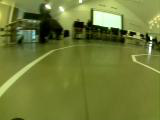

In [6]:
print(records[100])
records[100]['image']

### Create a matrix

Looks legit. Lets merge all the vectors into a matrix with the following format:

| record_id    | angle | throttle | image    |
| ------------ | ----- | -------- | -------- |
| 1            |   0.1 |   0.3    | PIL...   |         
| ...          |       |          |          |
| n            |       |          |          |

In [7]:
df = pd.DataFrame.from_records(records).set_index('record_id') # Use record_id as index
df.sort_index(inplace=True)                                    # Do not create a new copy when sorting
pd.set_option('display.max_columns', 10)                       # Make sure we can see all of the columns
pd.set_option('display.max_rows', 20)                          # Keep the output on one page
df

,angle,image,throttle
record_id,,,
1,0.000000,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.010315
2,0.000000,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.012894
3,0.000000,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.012894
4,0.000000,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.025781
5,0.000000,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.028352
6,0.000000,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.059282
7,0.000000,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.059282
8,0.000000,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.059282
9,0.000000,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.061861


### The Pandas DataFrame

Finally, let's look at some of the properties of the [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/api.html#dataframe) object

In [8]:
# Displays the top 5 rows (i.e. not top 5 elements based on label index)
df.head()

,angle,image,throttle
record_id,,,
1,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.010315
2,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.012894
3,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.012894
4,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.025781
5,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.028352


In [9]:
# Similar to head, but displays the last rows
df.tail()

,angle,image,throttle
record_id,,,
13626,-0.505173,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.244858
13627,-0.505173,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.244858
13628,-0.505173,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.244858
13629,-0.484573,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.244858
13630,0.000000,<PIL.JpegImagePlugin.JpegImageFile image mode=...,-0.000000


In [10]:
# The dimensions of the dataframe as a (rows, cols) tuple
df.shape

(13630, 3)

In [11]:
# The number of columns. Equal to df.shape[0]
len(df) 

13630

In [12]:
# An array of the column names
df.columns 

Index(['angle', 'image', 'throttle'], dtype='object')

In [13]:
# Columns and their types
df.dtypes

angle       float64
image        object
throttle    float64
dtype: object

In [14]:
# Axes
df.axes

[Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
                10,
             ...
             13621, 13622, 13623, 13624, 13625, 13626, 13627, 13628, 13629,
             13630],
            dtype='int64', name='record_id', length=13630),
 Index(['angle', 'image', 'throttle'], dtype='object')]

In [15]:
# Converts the frame to a two-dimensional table
df.values 

array([[0.0,
        <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x120 at 0x7FEB72E00BA8>,
        0.010315256202887],
       [0.0,
        <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x120 at 0x7FEB74E12BA8>,
        0.012894070253608001],
       [0.0,
        <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x120 at 0x7FEB72806BA8>,
        0.012894070253608001],
       ..., 
       [-0.505172887356181,
        <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x120 at 0x7FEB7390DE80>,
        0.244857631153294],
       [-0.484572893459883,
        <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x120 at 0x7FEB7404D5F8>,
        0.244857631153294],
       [0.0,
        <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x120 at 0x7FEB74C914E0>,
        -0.0]], dtype=object)

In [16]:
# Displays descriptive stats for all columns
df.describe()

,angle,throttle
count,13630.000000,13630.000000
mean,0.117213,0.235599
std,0.592303,0.013528
min,-1.000000,-0.000000
25%,-0.206214,0.226814
50%,0.010285,0.237121
75%,0.608264,0.244858
max,1.000000,0.250000


In [17]:
# Select one element returns a Pandas.Series object
df.loc[1]

angle                                                       0
image       <PIL.JpegImagePlugin.JpegImageFile image mode=...
throttle                                            0.0103153
Name: 1, dtype: object

In [18]:
# Select multiple elements returns a Pandas.DataFrame object
df.loc[1:5]

,angle,image,throttle
record_id,,,
1,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.010315
2,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.012894
3,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.012894
4,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.025781
5,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.028352


## Visualizing data

Let's see if we can make the data a little more visual.

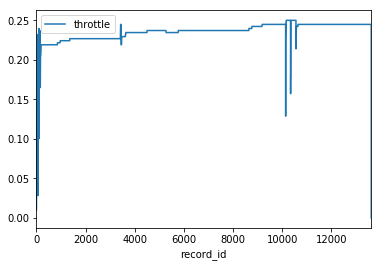

In [19]:
# Plot throttle only
%matplotlib inline

df.plot.line(y='throttle')

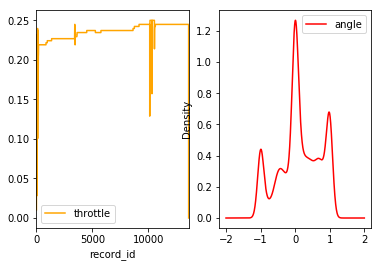

In [20]:
# Plot both throttle and angle next to each other
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)
df.plot(ax=axes[0], kind='line', y='throttle', color='orange')
df.plot(ax=axes[1], kind='density', y='angle', color='red')
plt.figure()

Nice.

We can see that throttle seems to be limited to 0.25 (see the [Donkey configuration file](https://github.com/wroscoe/donkey/blob/master/donkeycar/templates/config_defaults.py) for the explanation to that).

We can also see that to some extent, the car turns more towards one direction than to the other.

### Images

Let's also have a quick look at the images in the data set. One way is to create a video of all the images

In [23]:
%%time
import numpy
from cv2 import VideoWriter, VideoWriter_fourcc, cvtColor, COLOR_RGB2BGR
from contextlib import contextmanager

@contextmanager
def VideoCreator(*args, **kwargs):
    v = VideoWriter(*args, **kwargs)
    try:
        yield v
    finally:
        v.release()

def make_video(images, out='donkey-run.mp4', fps=20):
    '''
    Creates a video from PIL images
    '''
    if (len(images) <= 0):
      raise ValueError('Images array must not be empty')
    
    # Extract size from first image
    size = images[1].size
    
    # Create codec
    fourcc = VideoWriter_fourcc(*'H264')
    
    # Create a VideoCreator and return the new video
    with VideoCreator(out, fourcc, float(fps), size) as v:
        for img in images:
            arr = cvtColor(numpy.array(img), COLOR_RGB2BGR)
            v.write(arr)

    return out

video_file = os.path.join('~/SageMaker', make_video(df['image']))
print(video_file)

~/SageMaker/donkey-run.mp4
CPU times: user 36.3 s, sys: 524 ms, total: 36.9 s
Wall time: 21.9 s


Sadly, Jupyter notebooks do not currently support HTML5 video inline (v.5.0.0). You'll have to open it in a new tab:

[Run video](./donkey-run.mp4)

## Donkey library tools

- [http://docs.donkeycar.com/utility/donkey/](http://docs.donkeycar.com/utility/donkey/)

TODOs:
- !donkey --help
- !donkey tubclean
- !donkey tubhist
- !donkey tubplot
- !donkey tubcheck
- !donkey makevideo
- !donkey sim

In [33]:
!donkey

using donkey v2.2.1 ...
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/donkey", line 11, in <module>
    load_entry_point('donkeycar', 'console_scripts', 'donkey')()
  File "/home/ec2-user/SageMaker/donkey/donkeycar/management/base.py", line 421, in execute_from_command_line
    command_text = args[1]
IndexError: list index out of range


In [34]:
!donkey tubhist

using donkey v2.2.1 ...
usage: tubhist [options]
tubhist: error: the following arguments are required: tubs
